In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing dataset
sdata = pd.read_csv("social_network_ads.csv")

In [3]:
#Performing EDA

In [4]:
sdata.shape

(400, 5)

In [5]:
sdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
sdata.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
sdata.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
sdata.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
sdata.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [11]:
sdata.drop('User ID',axis =1,inplace = True)
sdata.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
#Converting Categorical Data into Numerical Data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sdata['Gender'] = le.fit_transform(sdata['Gender'])
sdata.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [13]:
#Seperatinng the data into X and Y

In [14]:
X = sdata.iloc[:,:-1].values
Y = sdata.iloc[:,-1].values

In [15]:
X.shape

(400, 3)

In [16]:
Y.shape

(400,)

In [17]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [19]:
Y = Y.reshape(-1)

In [20]:
Y.shape

(400,)

In [21]:
#splitting the data into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.25)

In [22]:
#importing Classification libraries
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Finding the k-value
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test,Y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

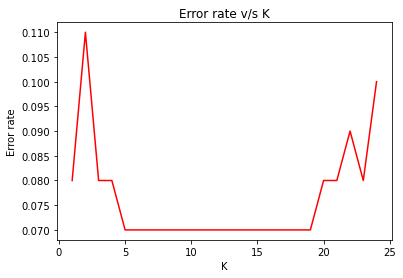

In [24]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [25]:
#Building Model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [26]:
#Evaluation
confusion_matrix(Y_test,Y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [27]:
accuracy_score(Y_test,Y_pred)

0.93